In [11]:
# Download extra libraries
!pip install wordcloud


     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# import necessary modules
from IPython.display import Image
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt	
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Graph Functions

In [12]:
def word_cloud(col):
	"""
	Takes in dataframe and plots a wordclous using matplotlib
	"""
	plt.subplots(figsize = (12,10))
	wordcloud = WordCloud(
							background_color = 'white',
							width = 1000,
							height = 800).generate(" ".join(col))
	plt.imshow(wordcloud)
	plt.axis('off')
	plt.show()


In [21]:
def create_bar_chart(serie):
    dist_val = serie.value_counts()
    dist_val.plot(kind='bar')
    

In [44]:
def create_pie_chart(panda_frame, label, count, title):
    # Create a pie chart
    
    panda_frame.plot(kind='pie', y=count, labels=panda_frame[label], autopct='%1.1f%%',figsize=(12, 12))

    # Add title
    plt.title(title)

    # Show the chart
    plt.show()

# Analysis

In [6]:
# Load JSON file into a Pandas DataFrame
streaming = pd.read_json('StreamingHistory1.json')
search_queries = pd.read_json('SearchQueries.json')
streaming.head()

,endTime,artistName,trackName,msPlayed
0,2023-01-05 16:22,Anna Landström,To the Rain,141966
1,2023-01-05 16:25,Joy Meyer-Williams,Autumn Night,172896
2,2023-01-05 16:28,Jon Hopkins,Wintergreen,180531
3,2023-01-05 16:30,Igulfrid,Hideaway,146806
4,2023-01-05 16:32,Giovanna Petrini,Nascondiglio,116950


In [7]:
search_queries.head()

,platform,searchTime,searchQuery,searchInteractionURIs
0,IPHONE_ARM64,2023-01-11T21:04:19.981Z[UTC],bla,[]
1,IPHONE_ARM64,2023-01-11T21:04:24.375Z[UTC],simply,[]
2,IPHONE_ARM64,2023-01-29T19:13:57.108Z[UTC],malo,[]
3,IPHONE_ARM64,2023-02-01T15:34:20.004Z[UTC],l’,[]
4,IPHONE,2023-02-01T15:34:21.141Z[UTC],l’appunt,[spotify:track:5PnEkOUOFnk0wMI71JwddQ]


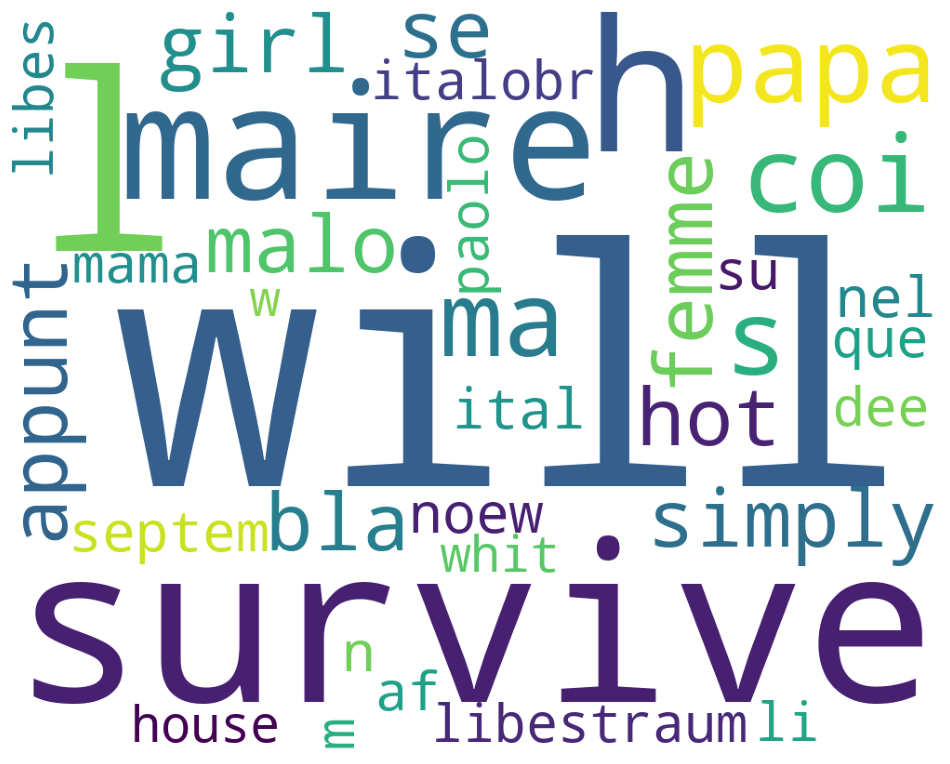

In [13]:
# display a frequency of words in world-cloud search history
word_cloud(search_queries['searchQuery'])

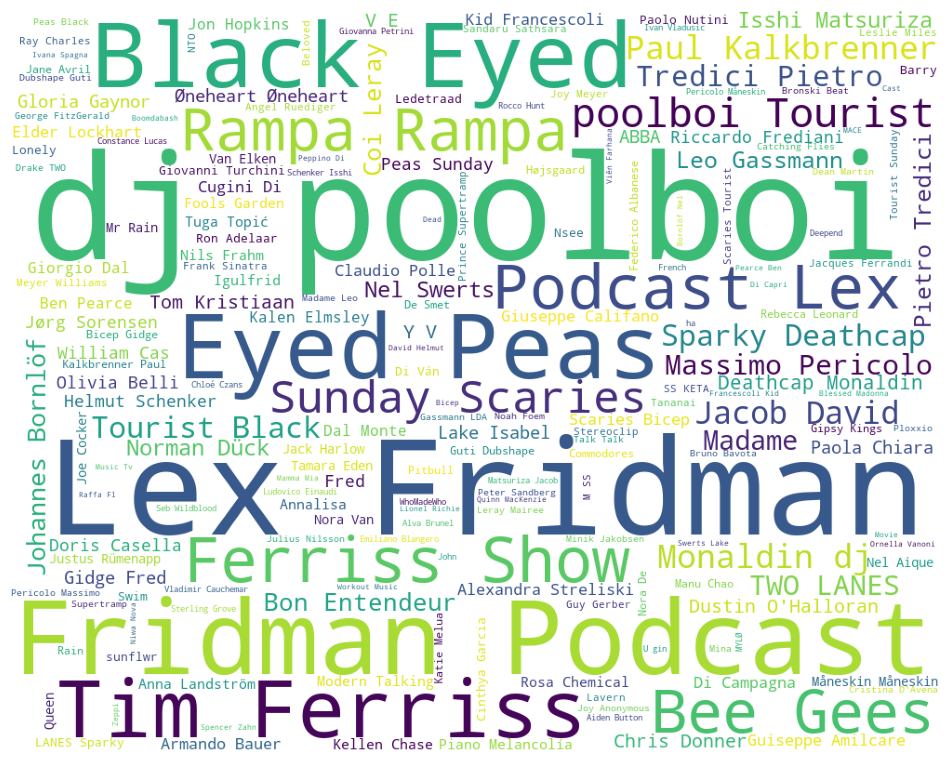

In [14]:
# display a frequency of words in world-cloud artist
word_cloud(streaming['artistName'])

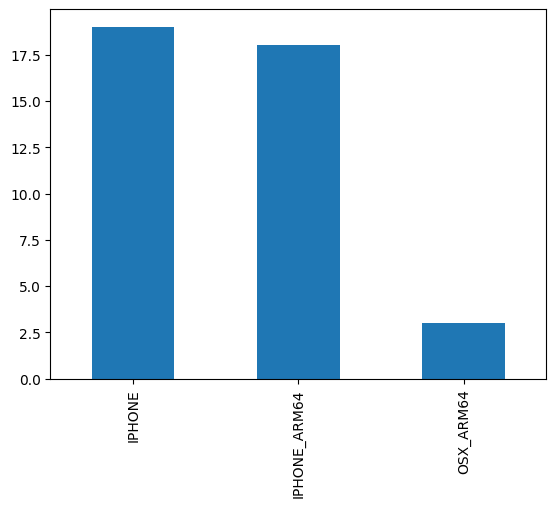

In [22]:
create_bar_chart(search_queries['platform'])

C:\Users\Diego\AppData\Local\Temp\ipykernel_16492\3229327103.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = df.head(20).groupby('trackName').sum().reset_index()


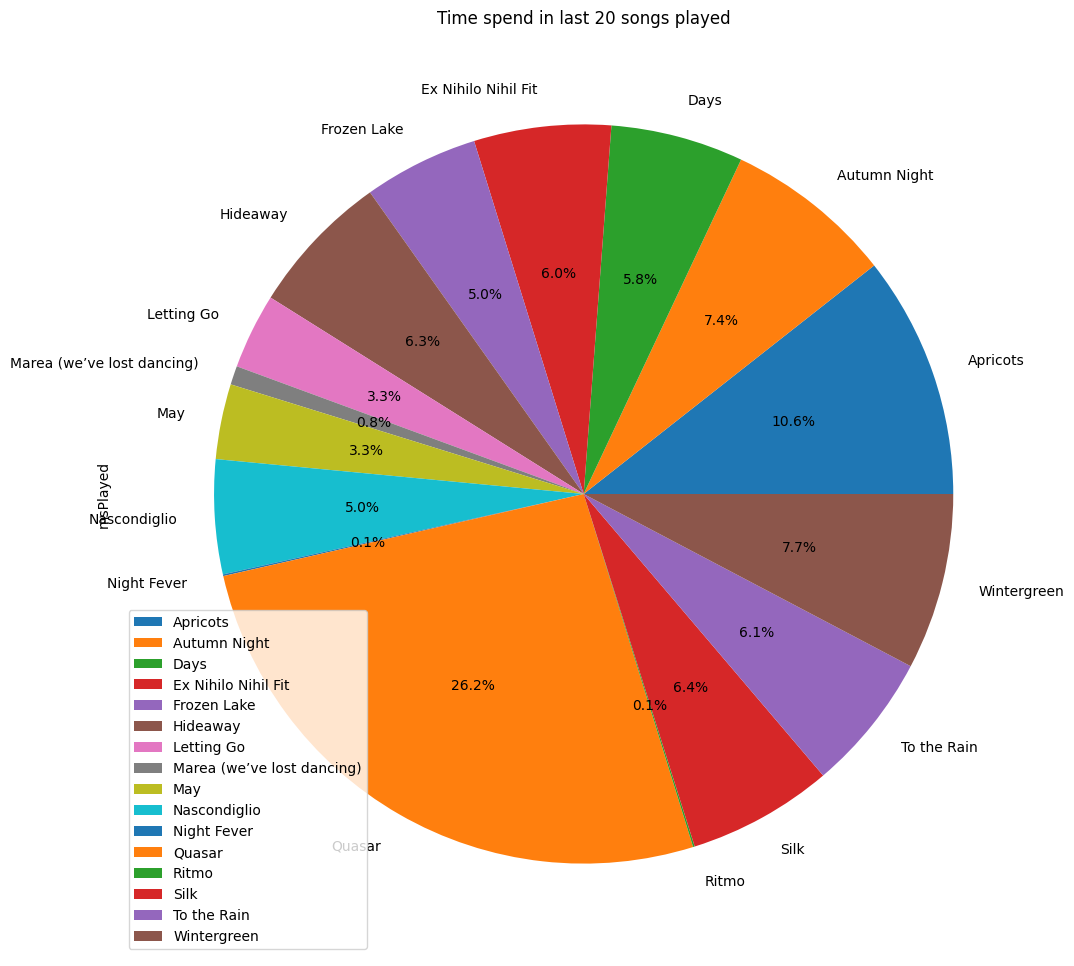

In [45]:
new_df = df.head(20).groupby('trackName').sum().reset_index()
create_pie_chart(new_df, 'trackName', 'msPlayed','Time spend in last 20 songs played')

In [46]:
new_df = df.head(20).groupby('artistName').sum().reset_index()
create_pie_chart(new_df, 'artistName', 'msPlayed', 'Time spend in last 20 songs by artist')

KeyError: 'artistName'